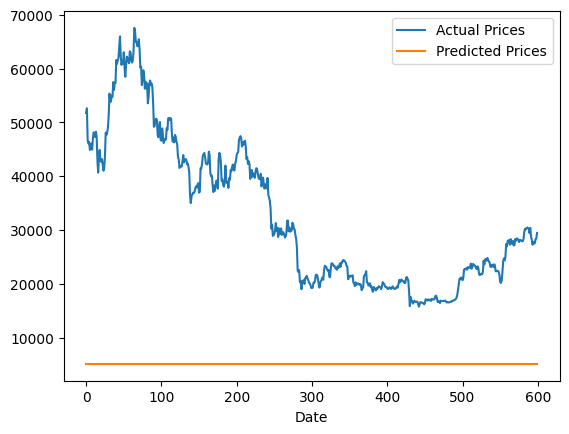

In [3]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.svm import SVR
import matplotlib.pyplot as plt

#Next, we can load the Bitcoin price data into a pandas dataframe:

df = pd.read_csv('BTC-USD.csv')
prices = np.array(df['Close'].tolist())
df.head()

#Split Test train set
train_size = int(len(prices) * 0.8)
train_prices = prices[:train_size]
test_prices = prices[train_size:]

def prepare_data(prices, window_size):
    x, y = [], []
    for i in range(len(prices) - window_size):
        window = prices[i:i + window_size]
        x.append(window[:-1])
        y.append(window[-1])
    return np.array(x), np.array(y)

# This function takes in the prices and a window size, and returns two numpy arrays: one containing the input data and one containing the output data. We can then use this function to prepare the training data:

window_size = 30
x_train, y_train = prepare_data(train_prices, window_size)

#We can then create an instance of the SVM:

svm = SVR(kernel='rbf', C=1e3, gamma=0.1)

svm.fit(x_train, y_train)

#We can then prepare the test data:

x_test, y_test = prepare_data(test_prices, window_size)

#We can then use the SVM to make predictions on the test data:

y_pred = svm.predict(x_test)

#We can then plot the predicted prices against the actual prices:

plt.plot(y_test, label='Actual Prices')
plt.plot(y_pred, label='Predicted Prices')
plt.xlabel('Date')
plt.legend()
plt.show()

In [4]:
from sklearn.metrics import r2_score
r2 = r2_score(y_test, y_pred)
print('R2 Score:', r2)

R2 Score: -3.9643606909138445


In [5]:
# Get the most recent window of prices
recent_window = test_prices[-window_size:-1]

# Use the SVM model to predict the next day's price
predicted_price_for_next_day = svm.predict([recent_window])

# Print the predicted price
print("Predicted price for the next day:", predicted_price_for_next_day)

Predicted price for the next day: [5142.81938557]
